In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
# training and test data
df_train = pd.read_csv('../datasets/clean_df_train.csv')
df_test = pd.read_csv('../datasets/clean_df_test.csv')

df_train = df_train.drop(columns = 'Unnamed: 0')
df_test = df_test.drop(columns = 'Unnamed: 0')

df_train.fillna(value = 0, inplace = True)
df_test.fillna(value = 0, inplace = True)

In [3]:
df_train.to_csv('../datasets/clean_df_train.csv')
df_test.to_csv('../datasets/clean_df_test.csv')

In [4]:
# combine columns for sq ft on train and test
sf_columns = [cols for cols in df_train.columns if 'sf' in cols]
sf_columns

['bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'wood_deck_sf',
 'open_porch_sf']

In [5]:
df_train['total_sq_ft'] = df_train['bsmtfin_sf_1'] + df_train['bsmtfin_sf_2'] + \
df_train['bsmt_unf_sf'] + df_train['total_bsmt_sf'] + df_train['1st_flr_sf'] + \
df_train['2nd_flr_sf'] + df_train['low_qual_fin_sf'] + df_train['wood_deck_sf'] + df_train['open_porch_sf']

In [6]:
df_test['total_sq_ft'] = df_test['bsmtfin_sf_1'] + df_test['bsmtfin_sf_2'] + \
df_test['bsmt_unf_sf'] + df_test['total_bsmt_sf'] + df_test['1st_flr_sf'] + \
df_test['2nd_flr_sf'] + df_test['low_qual_fin_sf'] + df_test['wood_deck_sf'] + df_test['open_porch_sf']

In [7]:
features = [col for col in df_train._get_numeric_data().columns 
            if col != 'saleprice']
X = df_train[features]
y = df_train['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 34)

In [8]:
lr = LinearRegression()

In [9]:
lr_score = cross_val_score(lr, X_train, y_train, cv=3)
lr_score.mean()

0.7561030948609573

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
lr.score(X_train, y_train)

0.8340044397898345

In [12]:
lr.score(X_test, y_test)

0.8530737378134947

In [13]:
lr_score.mean()

0.7561030948609573

In [14]:
predictions = lr.predict(X_test)

In [15]:
r2_score(y_test, predictions)

0.8530737378134947

In [16]:
residuals = y_test - predictions

In [17]:
residuals

490     -6634.520074
486    -24109.584099
1214    -3706.639378
936     15132.103521
1531    14472.611628
            ...     
121      1212.579330
584     -7384.180104
972    -23053.073723
770     26987.391265
869      4992.825073
Name: saleprice, Length: 513, dtype: float64

In [18]:
kag_submission = df_test

In [19]:
kag_pred = lr.predict(df_test[features])

In [20]:
kag_submission['saleprice'] = kag_pred

In [21]:
kag_submission[['id', 'saleprice']]

,id,saleprice
0,2658,121108.402904
1,2718,144491.212333
2,2414,216024.825397
3,1989,119298.370918
4,625,200090.267419
...,...,...
873,1662,201173.862302
874,1234,220810.644459
875,1373,119418.181214
876,1672,103369.742772


In [22]:
kaggle = kag_submission[['id', 'saleprice']]

In [23]:
kaggle.to_csv('../datasets/kaggle.csv', index = False)

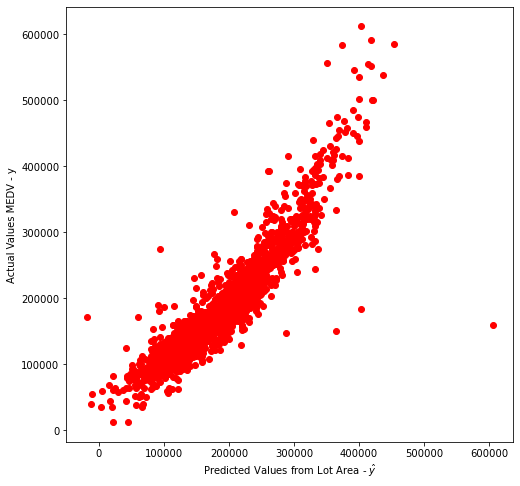

In [24]:
#Plot
predictions = lr.predict(X)
# score = model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, c ='r')
plt.xlabel("Predicted Values from Lot Area - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

<AxesSubplot:>

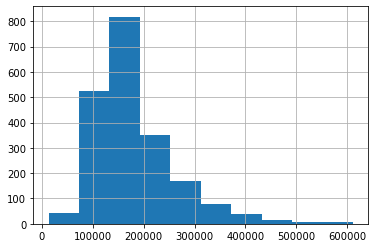

In [25]:
y.hist()

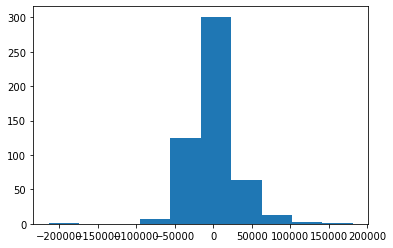

In [26]:
plt.hist(residuals);

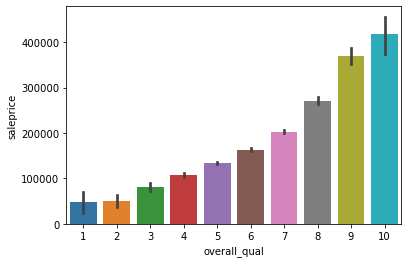

In [27]:
ax = sns.barplot(x = df_train['overall_qual'], y = df_train['saleprice'])

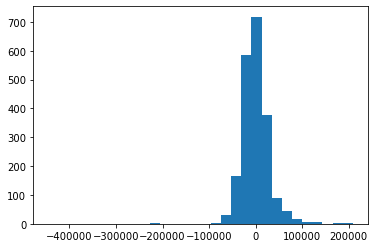

In [28]:
residuals = y - predictions
plt.hist(residuals, bins=30);

In [29]:
num_corr1 = ['overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf'] 

num_corr2 = ['1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath']

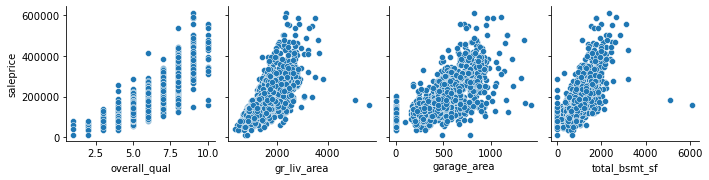

In [30]:
sns.pairplot(df_train, y_vars = ['saleprice'], x_vars = num_corr1);

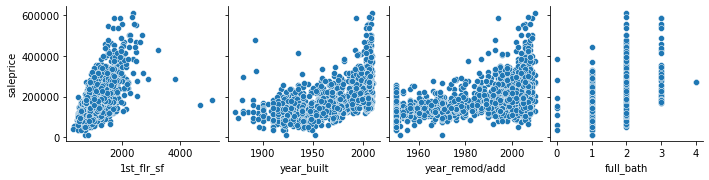

In [31]:
sns.pairplot(df_train, y_vars = ['saleprice'], x_vars = num_corr2);

### Dummy Columns

In [32]:
# create dummy columns
dummies_neighborhood = pd.get_dummies(df_train['neighborhood'])
dummies_ext = pd.get_dummies(df_train['exter_qual'])
dummies_bmt_qual = pd.get_dummies(df_train['bsmt_qual'])
dummies_bmt_cond = pd.get_dummies(df_train['bsmt_cond'])
dummies_bmt_qual = pd.get_dummies(df_train['bsmt_qual'])
df_train['neighborhood'] = dummies_neighborhood.cumsum(axis=1).ne(1).sum(axis=1)
df_train['exter_qual'] = dummies_ext.cumsum(axis=1).ne(1).sum(axis=1)
df_train['bsmt_cond'] = dummies_bmt_cond.cumsum(axis=1).ne(1).sum(axis=1)
df_train['bsmt_qual'] = dummies_bmt_qual.cumsum(axis=1).ne(1).sum(axis=1)

## Lasso

In [33]:
feature_lasso = [col for col in df_train._get_numeric_data().columns 
                 if col != 'saleprice']

X_lasso = df_train[feature_lasso]
y_lasso = df_train['saleprice']

X_lso_train, X_lso_test, y_lso_train, y_lso_test = train_test_split(X_lasso, y_lasso)

In [34]:
ss = StandardScaler()

In [35]:
ss.fit(X_lso_train)

StandardScaler()

In [36]:
train_lso_sc = ss.transform(X_lso_train)
test_lso_sc = ss.transform(X_lso_test)

In [37]:
alpha_lso = np.logspace(-2, 2, 100)
model_lso = LassoCV(alphas=alpha_lso)

In [38]:
model_lso.fit(train_lso_sc, y_lso_train)

LassoCV(alphas=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05480231e-0...
       1.17681195e+01, 1.29154967e+01, 1.41747416e+01, 1.55567614e+01,
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]))

In [39]:
lso_score_train = model_lso.score(train_lso_sc, y_lso_train)
lso_score_test = model_lso.score(test_lso_sc, y_lso_test)
print(lso_score_train)
print(lso_score_test)

0.8818163160000444
0.7244366387873422


### Ridge

In [40]:
def ridge_coefs(X, Y, alphas):
    coefs = []

    ridge_reg = Ridge()
    
    for a in alphas:
        ridge_reg.set_params(alpha=a)
        ridge_reg.fit(X, Y)
        coefs.append(ridge_reg.coef_)
        
    return coefs

In [41]:
r_alphas = np.logspace(0, 5, 200)

r_coefs = ridge_coefs(X, y, r_alphas)

In [42]:
r_alphas = np.logspace(0, 5, 200)

r_coefs = ridge_coefs(X, y, r_alphas)